In [6]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data',
                 engine='python',encoding='cp949',header=None)

In [5]:
x_data = df.iloc[:, 1:-1].values
y_data = df.iloc[:, -1].values

In [9]:
model_scaler = MinMaxScaler()
model_scaler.fit(x_data)
x_data = model_scaler.transform(x_data)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data)

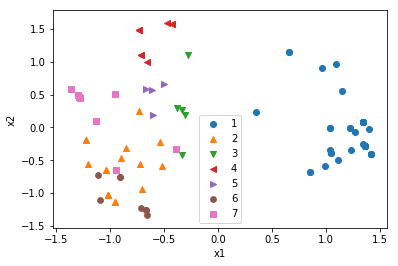

In [19]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') 

from sklearn import decomposition
model_dimensionality = decomposition.PCA(n_components=2)
model_dimensionality.fit(x_data)    
x_data_dimensionality = model_dimensionality.transform(x_data)    
x_train_dimensionality = model_dimensionality.transform(x_train)
x_test_dimensionality = model_dimensionality.transform(x_test)      
#
plt.scatter(x_data_dimensionality[:,0][y_data==1], x_data_dimensionality[:,1][y_data==1], label='1', marker='o')
plt.scatter(x_data_dimensionality[:,0][y_data==2], x_data_dimensionality[:,1][y_data==2], label='2', marker='^')
plt.scatter(x_data_dimensionality[:,0][y_data==3], x_data_dimensionality[:,1][y_data==3], label='3', marker='v')
plt.scatter(x_data_dimensionality[:,0][y_data==4], x_data_dimensionality[:,1][y_data==4], label='4', marker='<')
plt.scatter(x_data_dimensionality[:,0][y_data==5], x_data_dimensionality[:,1][y_data==5], label='5', marker='>')
plt.scatter(x_data_dimensionality[:,0][y_data==6], x_data_dimensionality[:,1][y_data==6], label='6', marker='8')
plt.scatter(x_data_dimensionality[:,0][y_data==7], x_data_dimensionality[:,1][y_data==7], label='7', marker='s')
#
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [21]:
model = KNeighborsClassifier(**{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'})

model.fit(x_train, y_train)

y_predict = model.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print(score)

0.9615384615384616


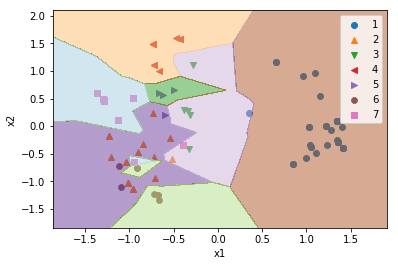

In [22]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#
from sklearn import decomposition
model_dimensionality = decomposition.PCA(n_components=2)
model_dimensionality.fit(x_data)    
x_data_dimensionality = model_dimensionality.transform(x_data)    
x_train_dimensionality = model_dimensionality.transform(x_train)
x_test_dimensionality = model_dimensionality.transform(x_test)      
#
plt.scatter(x_data_dimensionality[:,0][y_data==1], x_data_dimensionality[:,1][y_data==1], label='1', marker='o')
plt.scatter(x_data_dimensionality[:,0][y_data==2], x_data_dimensionality[:,1][y_data==2], label='2', marker='^')
plt.scatter(x_data_dimensionality[:,0][y_data==3], x_data_dimensionality[:,1][y_data==3], label='3', marker='v')
plt.scatter(x_data_dimensionality[:,0][y_data==4], x_data_dimensionality[:,1][y_data==4], label='4', marker='<')
plt.scatter(x_data_dimensionality[:,0][y_data==5], x_data_dimensionality[:,1][y_data==5], label='5', marker='>')
plt.scatter(x_data_dimensionality[:,0][y_data==6], x_data_dimensionality[:,1][y_data==6], label='6', marker='8')
plt.scatter(x_data_dimensionality[:,0][y_data==7], x_data_dimensionality[:,1][y_data==7], label='7', marker='s')
#
x1min=x_data_dimensionality[:,0].min() - 0.5
x1max=x_data_dimensionality[:,0].max() + 0.5
x2min=x_data_dimensionality[:,1].min() - 0.5
x2max=x_data_dimensionality[:,1].max() + 0.5
X1, X2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000), np.arange(x2min, x2max, (x2max-x2min)/1000))
import copy
model_deepcopied = copy.deepcopy(model)
model_deepcopied.fit(x_train_dimensionality, y_train)
Y = np.reshape(model_deepcopied.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
plt.contourf(X1, X2, Y, cmap=mpl.cm.Paired_r, alpha=0.5)
#

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend() #범례
plt.show()

In [28]:
estimator = SVC(kernel='rbf', C=10, gamma=0.1) 

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print(score) #1.0

1.0
0.9615384615384616
